In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('dataset2.csv')
data_2 = data

In [3]:
data.columns

Index(['ag+1:629e', 'feeling.nervous', 'panic', 'breathing.rapidly',
       'sweating', 'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'introvert',
       'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'hallucinations',
       'repetitive.behaviour', 'seasonally', 'increased.energy', 'Disorder'],
      dtype='object')

In [4]:
Disorder_data = data['Disorder']
for label in Disorder_data:
    if label == "OCD":
        data.loc[data['Disorder'] == label, 'Disorder'] = "OCD"
    else:
        data.loc[data['Disorder'] == label, 'Disorder'] = "Not OCD"

In [5]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Disorder'] = LE.fit_transform(data['Disorder'])

In [6]:
data = data.drop(['seasonally'],axis=1)

<Axes: >

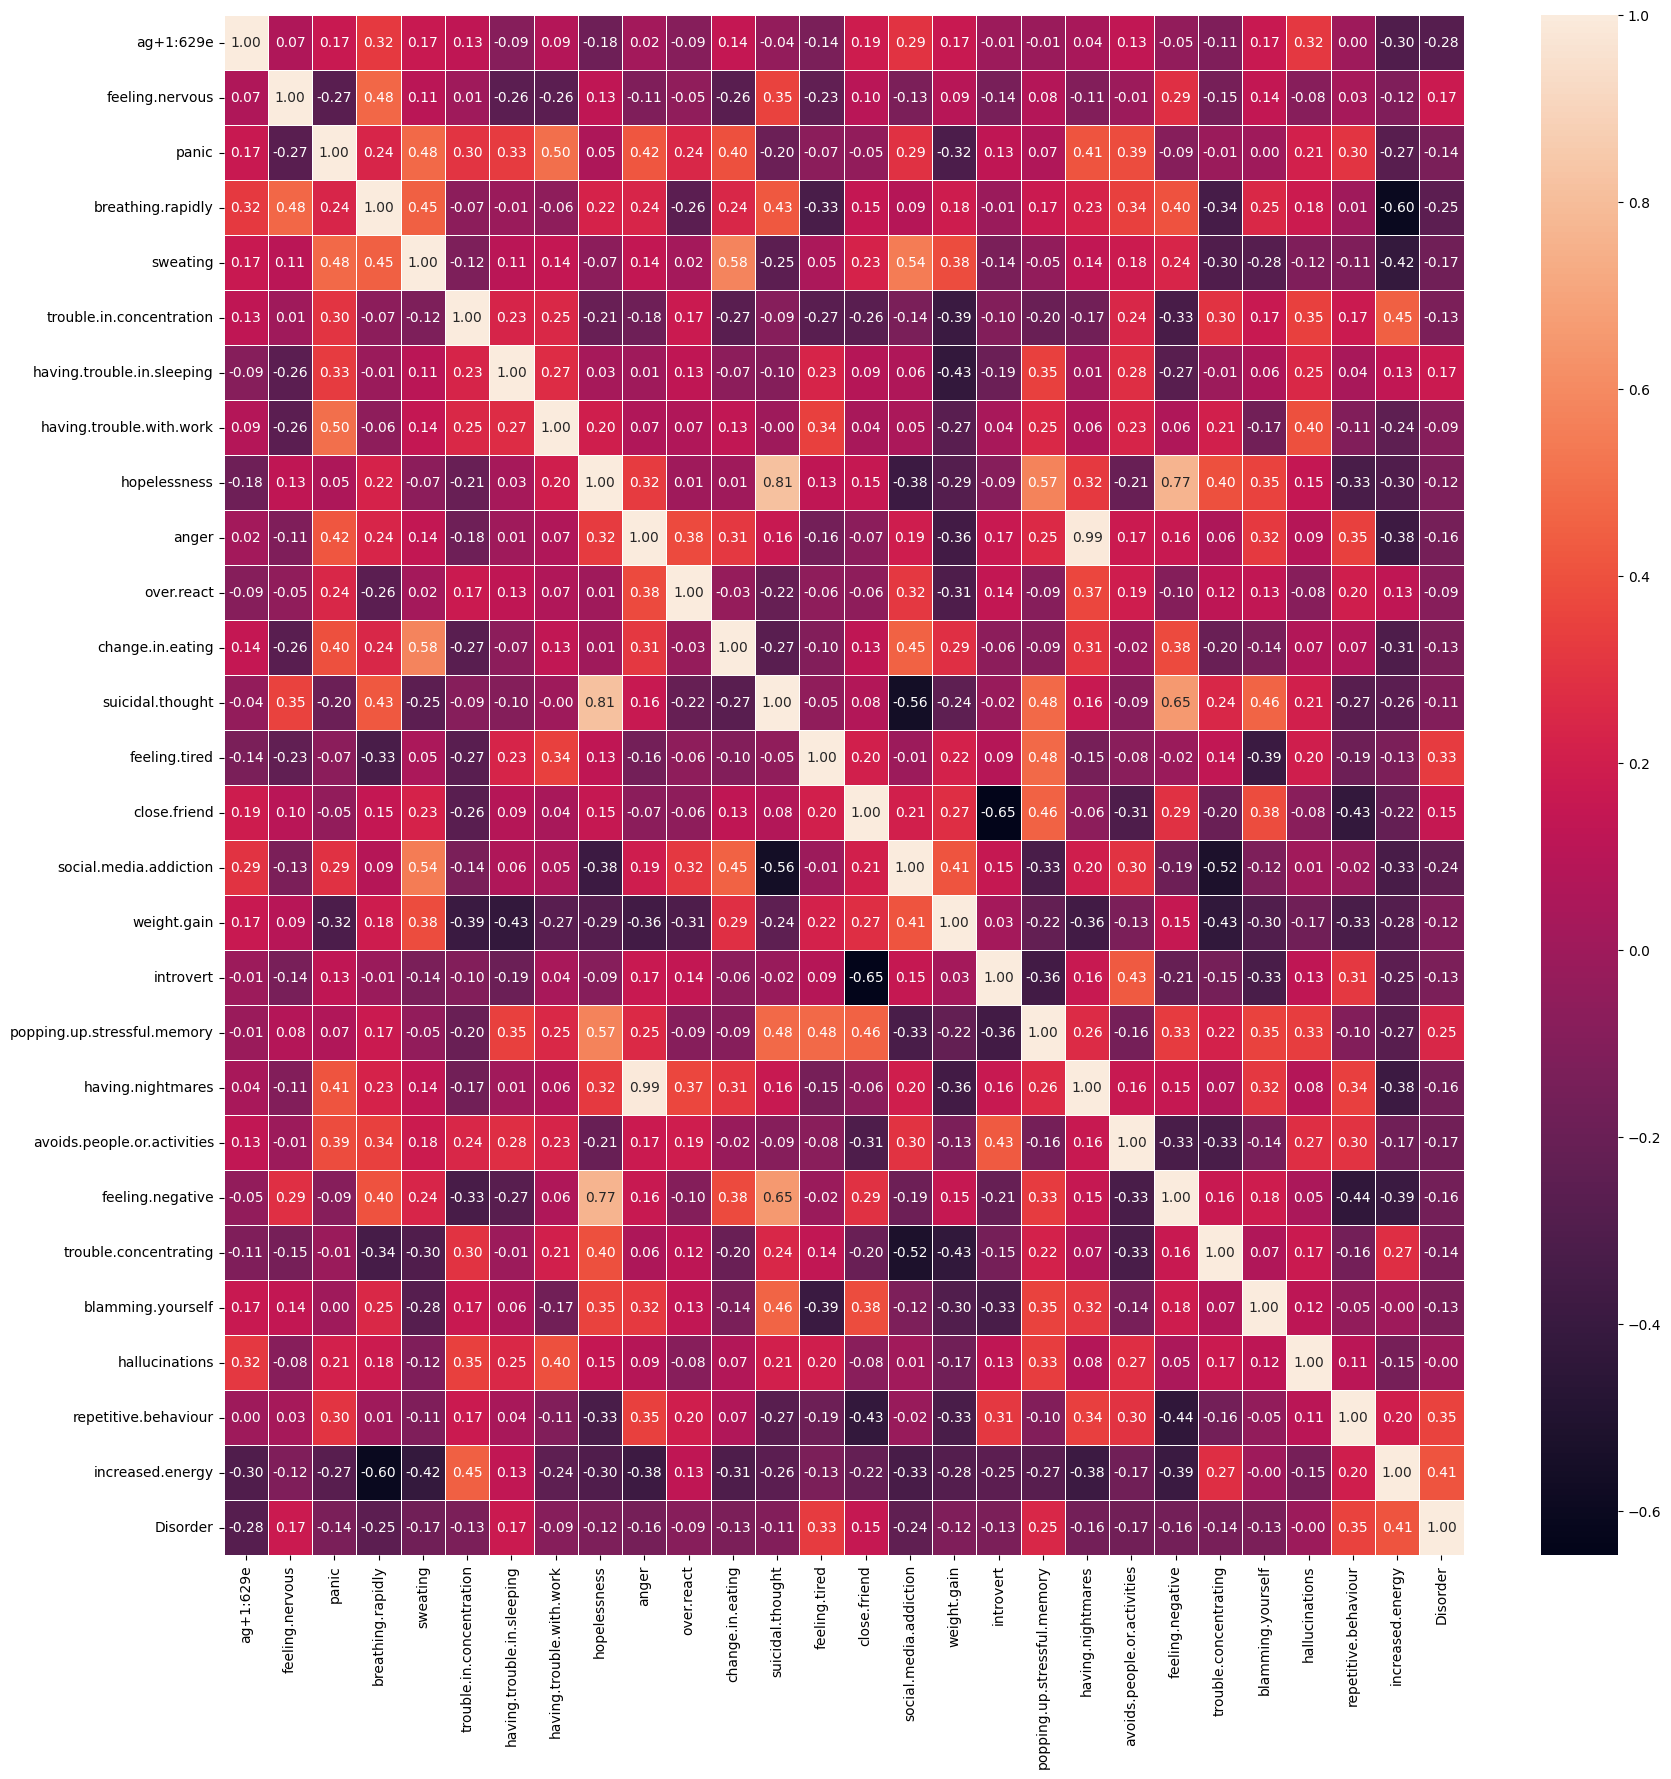

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax, fmt='.2f')

In [8]:
corr = data.corr()

In [9]:
data = data.rename(columns={'ag+1:629e':'age'})

In [10]:
print(corr['Disorder'].sort_values(ascending=False))

Disorder                       1.000000
increased.energy               0.412937
repetitive.behaviour           0.354883
feeling.tired                  0.327152
popping.up.stressful.memory    0.245070
feeling.nervous                0.170024
having.trouble.in.sleeping     0.170024
close.friend                   0.151895
hallucinations                -0.003935
over.react                    -0.085696
having.trouble.with.work      -0.089531
suicidal.thought              -0.106159
weight.gain                   -0.117290
hopelessness                  -0.124429
trouble.in.concentration      -0.126320
change.in.eating              -0.128805
blamming.yourself             -0.128805
introvert                     -0.131539
panic                         -0.138653
trouble.concentrating         -0.143295
anger                         -0.156926
having.nightmares             -0.158614
feeling.negative              -0.162574
avoids.people.or.activities   -0.171183
sweating                      -0.172928


In [11]:
data=data.drop(['hallucinations','over.react','having.trouble.with.work'],axis=1)
data_2=data_2.drop(['hallucinations','over.react','having.trouble.with.work','seasonally'],axis=1)

In [12]:
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [13]:
x = data_2.drop(['Disorder'],axis=1)
y = data_2['Disorder']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [14]:
mod1 = LinearSVC(penalty='l1',dual=False)
mod1.fit(x_train,y_train)
pred1 = mod1.predict(x_test)

In [15]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00         6

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



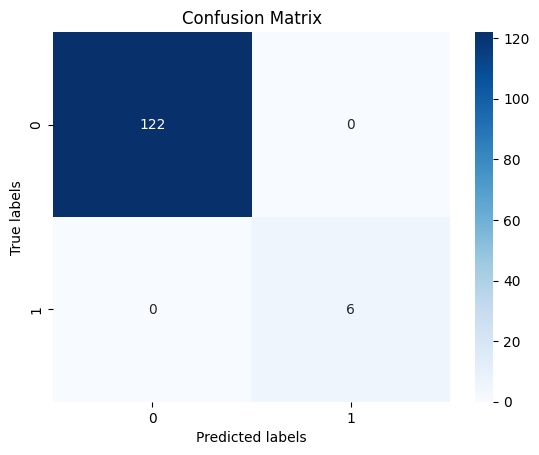

In [16]:
cm = confusion_matrix(y_test,pred1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
mod1 = SVC()
mod1.fit(x_train,y_train)
pred1 = mod1.predict(x_test)

In [18]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       128
           1       0.00      0.00      0.00         0

    accuracy                           0.95       128
   macro avg       0.50      0.48      0.49       128
weighted avg       1.00      0.95      0.98       128



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

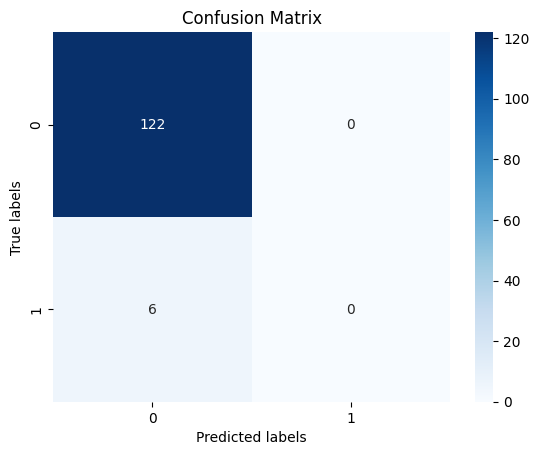

In [19]:
cm = confusion_matrix(y_test,pred1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
mod2 = GaussianNB()
mod2.fit(x_train,y_train)
pred2 = mod2.predict(x_test)

In [21]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00         6

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



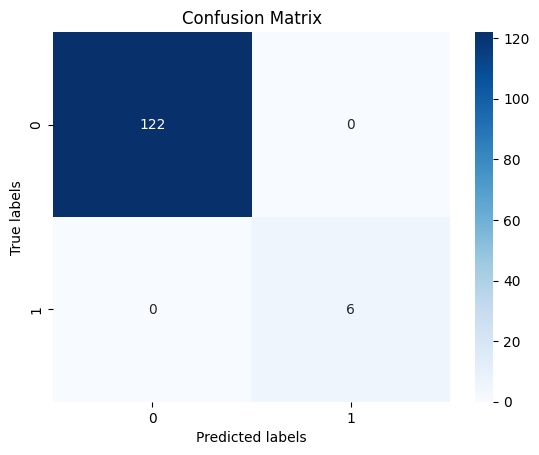

In [22]:
cm = confusion_matrix(y_test,pred2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.8, random_state=42)

In [24]:
mod1 = LinearSVC(penalty='l1',dual=False)
mod1.fit(x_train,y_train)
pred1 = mod1.predict(x_test)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
print(classification_report(pred1,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       105

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243



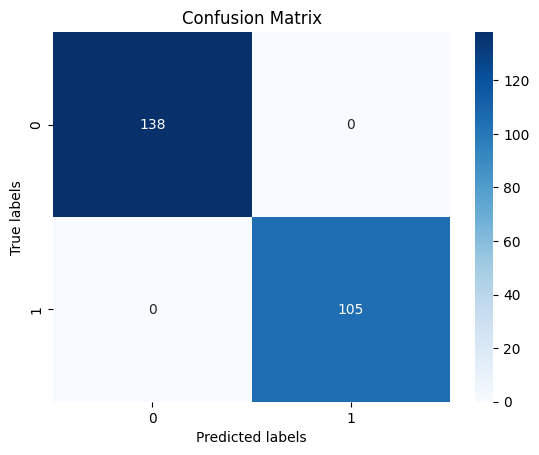

In [26]:
cm = confusion_matrix(y_test,pred1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
mod1 = SVC()
mod1.fit(x_train,y_train)
pred1 = mod1.predict(x_test)

In [28]:
print(classification_report(pred1,y_test))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       142
           1       0.96      1.00      0.98       101

    accuracy                           0.98       243
   macro avg       0.98      0.99      0.98       243
weighted avg       0.98      0.98      0.98       243



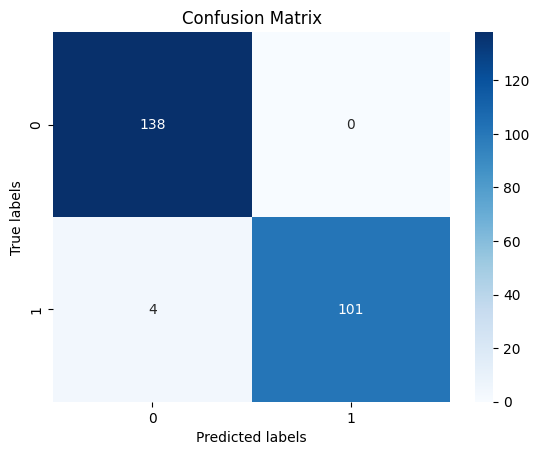

In [29]:
cm = confusion_matrix(y_test,pred1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
mod2 = GaussianNB()
mod2.fit(x_train,y_train)
pred2 = mod2.predict(x_test)

In [31]:
print(classification_report(pred1,y_test))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       142
           1       0.96      1.00      0.98       101

    accuracy                           0.98       243
   macro avg       0.98      0.99      0.98       243
weighted avg       0.98      0.98      0.98       243



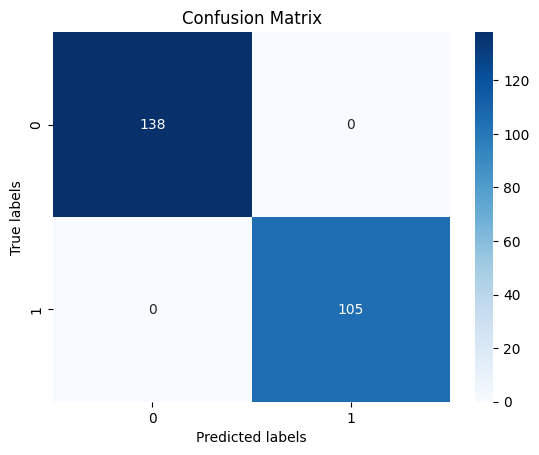

In [32]:
cm = confusion_matrix(y_test,pred2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()